In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os

In [1]:
%cd /content/drive/My Drive/Brodatz Dataset

/content/drive/My Drive/Brodatz Dataset


In [2]:
%ls

Class1/    Class25/  Class52/  Class8/
Class10/   Class26/  Class53/  Class80/
Class100/  Class27/  Class54/  Class81/
Class101/  Class28/  Class55/  Class82/
Class102/  Class29/  Class56/  Class83/
Class103/  Class3/   Class57/  Class84/
Class104/  Class30/  Class58/  Class85/
Class105/  Class31/  Class59/  Class86/
Class106/  Class32/  Class6/   Class87/
Class107/  Class33/  Class60/  Class88/
Class108/  Class34/  Class61/  Class89/
Class109/  Class35/  Class62/  Class9/
Class11/   Class36/  Class63/  Class90/
Class110/  Class37/  Class64/  Class91/
Class111/  Class38/  Class65/  Class92/
Class112/  Class39/  Class66/  Class93/
Class12/   Class4/   Class67/  Class94/
Class13/   Class40/  Class68/  Class95/
Class14/   Class41/  Class69/  Class96/
Class15/   Class42/  Class7/   Class97/
Class16/   Class43/  Class70/  Class98/
Class17/   Class44/  Class71/  Class99/
Class18/   Class45/  Class72/  ConfusionMatrixInceptionV3_10epochs_Brodatz.png
Class19/   Class46/  Class73/  ConfusionMat

In [3]:
import cv2
from glob import glob
from matplotlib import image as img


In [4]:
images, labels = [], []

In [5]:
paths={}
for i in range(112):
  paths[i]='Class'+str((i+1))


In [6]:
for i in range(112):
  g=glob(paths[i]+'/*.png')
  for image_path in g:  
    try:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224)) # default values
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converting to RGB
        images.append(image)
        labels.append(i)
    except:
        print(image_path)
 

In [7]:
print(len(images))
print(len(labels))

4480
4480


In [8]:
import numpy as np
data = np.array(images)
labels = np.array(labels)
X_train=data
print(X_train.shape)


(4480, 224, 224, 3)


In [9]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes = 112)


In [10]:
labels.shape

(4480, 112)

In [11]:
# splitting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels,test_size = 0.2,random_state = 101,shuffle = True)
print('training:')
print(X_train.shape)
print(y_train.shape)
print('testing:')
print(X_test.shape)
print(y_test.shape)

training:
(3584, 224, 224, 3)
(3584, 112)
testing:
(896, 224, 224, 3)
(896, 112)


In [12]:
X_train=X_train/255

In [13]:
X_test=X_test/255

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenerator = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
augmented_training_data = datagenerator.flow(X_train, y_train, batch_size = 32,shuffle=False)

In [30]:
import tensorflow as tf
import tensorflow_hub as hub
feature_extractor_model = 'https://tfhub.dev/google/imagenet/inception_v3/classification/4'
#feature_extractor_model = 'https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5'

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


In [31]:
num_of_classes=112

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              23853833  
                                                                 
 dense_1 (Dense)             (None, 112)               112224    
                                                                 
Total params: 23,966,057
Trainable params: 112,224
Non-trainable params: 23,853,833
_________________________________________________________________


In [32]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['acc'])
#history=model.fit(X_train,y_train,epochs=10)
history = model.fit_generator(augmented_training_data, epochs =10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


112/112 [==============================] - 379s 3s/step - loss: 1.6614 - acc: 0.6643
Epoch 2/10
112/112 [==============================] - 374s 3s/step - loss: 0.1749 - acc: 0.9629
Epoch 3/10
112/112 [==============================] - 374s 3s/step - loss: 0.1012 - acc: 0.9785
Epoch 4/10
112/112 [==============================] - 375s 3s/step - loss: 0.0614 - acc: 0.9886
Epoch 5/10
112/112 [==============================] - 374s 3s/step - loss: 0.0457 - acc: 0.9902
Epoch 6/10
112/112 [==============================] - 378s 3s/step - loss: 0.0341 - acc: 0.9933
Epoch 7/10
112/112 [==============================] - 375s 3s/step - loss: 0.0293 - acc: 0.9939
Epoch 8/10
112/112 [==============================] - 380s 3s/step - loss: 0.0245 - acc: 0.9953
Epoch 9/10
112/112 [==============================] - 378s 3s/step - loss: 0.0161 - acc: 0.9978
Epoch 10/10
112/112 [==============================] - 380s 3s/step - loss: 0.0117 - acc: 0.9994


In [33]:
model.evaluate(X_test,y_test)   

28/28 [==============================] - 95s 3s/step - loss: 0.0270 - acc: 0.9933


[0.027022698894143105, 0.9933035969734192]

In [34]:
model.save('InceptionV3_Brodatz_10epochs')

INFO:tensorflow:Assets written to: InceptionV3_Brodatz_10epochs/assets


INFO:tensorflow:Assets written to: InceptionV3_Brodatz_10epochs/assets


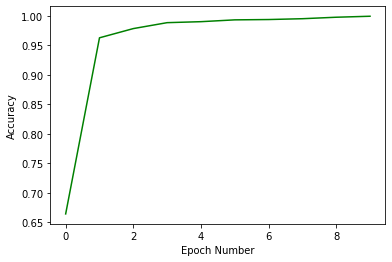

In [35]:
# plotting the graphs of epoch, accuracy and loss

import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['acc'], color = 'green')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
fig1 = plt.gcf()
plt.show()
fig1.savefig('PlotAccuracyInceptionV3_10epochs_Brodatz',dpi=100)


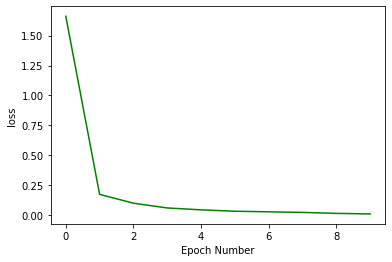

In [36]:
# plotting the losses
plt.plot(history.epoch, history.history['loss'], color = 'green')
plt.xlabel('Epoch Number')
plt.ylabel('loss')
fig1 = plt.gcf()
plt.show()
fig1.savefig('PlotLossesInceptionV3_10epochs_Brodatz',dpi=100)


In [37]:
# confusion matrix
from sklearn.metrics import confusion_matrix

y_true = np.argmax(y_test, axis = 1) # decoding

predict_x=model.predict(X_test) 
predicted_classes=np.argmax(predict_x,axis=1)


confusion_mat = confusion_matrix(y_true, predicted_classes)

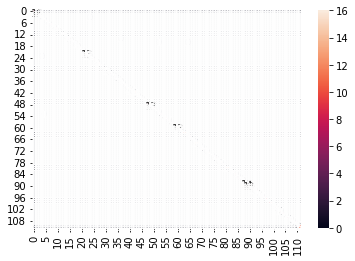

In [38]:
import seaborn as sns
sns.heatmap(confusion_mat, annot = True)
fig1 = plt.gcf()
plt.show()

In [25]:
fig1.savefig('ConfusionMatrixInceptionV3_10epochs_Brodatz',dpi=100)

In [26]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

In [27]:
from sklearn.metrics import classification_report

In [28]:
target_names = []
for i in range(112):
  target_names.append('Class'+str(i+1))

In [29]:
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))


Classification Report
              precision    recall  f1-score   support

      Class1       1.00      1.00      1.00         7
      Class2       1.00      1.00      1.00        16
      Class3       1.00      1.00      1.00         7
      Class4       0.77      1.00      0.87        10
      Class5       1.00      1.00      1.00         8
      Class6       1.00      1.00      1.00         9
      Class7       1.00      1.00      1.00         8
      Class8       1.00      1.00      1.00         7
      Class9       1.00      1.00      1.00         8
     Class10       1.00      1.00      1.00         7
     Class11       1.00      1.00      1.00         5
     Class12       1.00      1.00      1.00         7
     Class13       1.00      1.00      1.00         8
     Class14       1.00      1.00      1.00         5
     Class15       1.00      1.00      1.00         8
     Class16       1.00      1.00      1.00         6
     Class17       1.00      1.00      1.00        10
     